# Matrix
 머신러닝에서는 학습시 행렬 연산을 굉장히 많이 사용한다. 텐서플로우 또한 이를 위한 프레임워크이므로 많이 사용한다. 텐서플로우에서의 행렬 표현 및 연산을 알아보자.


- - -
# 행렬의 표현

In [1]:
import tensorflow as tf

# x는 1x3 행렬
x = tf.constant([ [1.0,2.0,3.0] ])

# w는 3*1 행렬
w = tf.constant([ [2.0],[2.0],[2.0] ])

# tensorflow에서의 행렬 곱!
y = tf.matmul(x,w)
print(x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)
print(result)

(1, 3)
[[12.]]


정말 간단한 행렬의 곱이다. get_shape()를 통해 tensor의 행렬 shape를 알아낼 수 있다.
<br>또한 matmul을 통해서 행렬의 곱을 수행할 수 있다는 것을 확인해주었다.

In [2]:
import tensorflow as tf

x = tf.Variable([ [1.,2.,3.] ], dtype=tf.float32)
w = tf.constant([ [2.],[2.],[2.]], dtype=tf.float32)
y = tf.matmul(x,w)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)
print(result)

[[12.]]


특별한 코드는 아니고, constant 말고 variable도 사용이 가능하다는 내용이다.

In [3]:
import tensorflow as tf

input_data1 = [ [1.,2.,3.],[1.,2.,3.],[2.,3.,4.] ] #3x3 matrix
input_data2 = [ [2.,3.,4.],[1.,2.,3.],[2.,3.,4.], [3, 4, 5] ] #4x3 matrix

x = tf.placeholder(dtype=tf.float32,shape=[None,3])
w = tf.Variable([ [2.],[2.],[2.] ], dtype = tf.float32) #3x1 matrix

# y는 x, w의 곱(x : placeholder, w : Variable)
y = tf.matmul(x,w)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# y는 placeholder, 값을 넣어주면 된다.
result1 = sess.run(y,feed_dict={x:input_data1})
result2 = sess.run(y,feed_dict={x:input_data2})

print('result1\n',result1)
print('\nresult2\n',result2)

result1
 [[12.]
 [12.]
 [18.]]

result2
 [[18.]
 [12.]
 [18.]
 [24.]]


 placeholder에서의 shape 정의하는 부분에서 [None, 3]으로 만들어 준 것을 보자. w는 3x1 행렬으로 x는 반드시 Ox3 matrix이면 된다. 즉 학습데이터의 feature가 3개, 데이터의 양은 다를 수 있기 때문에 이를 지정하지 않고 데이터를 만들어 준다는 것이다. None으로 해놓으면 들어오는 숫자에 따라 저장을 해준다.
 <br><br>    * [None, None] 도 가능하다.

- - -
# 브로드 캐스팅

In [4]:
import tensorflow as tf

input_data = [
     [1,1,1],[2,2,2]
    ]
x = tf.placeholder(dtype=tf.float32,shape=[2,3])
w  =tf.Variable([[2],[2],[2]],dtype=tf.float32)
b  =tf.Variable([4],dtype=tf.float32)
y = tf.matmul(x,w)+b

print('X\'s shape')
print(x.get_shape())
print('w\'s shape')
print(w.get_shape())
print('b\'s shape')
print(b.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y,feed_dict={x:input_data})

print('\nx*w+b')
print(result)

X's shape
(2, 3)
w's shape
(3, 1)
b's shape
(1,)

x*w+b
[[10.]
 [16.]]


 위의 코드에서 X는 2*3 matrix, w는 3*1 matrix, b는 1*1 matrix이다.<br>
 즉 X * w는 2*1 matrix이므로 X*w + b는 2*1 + 1*1 matrix로 덧셈이 불가능하다.<br>
 이때 tensorflow는 자동으로 b 행렬을 2*1로 늘려주어 계산해준다.(stretch 개념)

In [5]:
import tensorflow as tf

input_data = [
     [0,0,0]
    ,[10,10,10]
    ,[20,20,20]
    ,[30,30,30]
    ]
x = tf.placeholder(dtype=tf.float32,shape=[None,3])
w  =tf.Variable([[0, 1, 2]],dtype=tf.float32)
y = x+w

print('X\'s shape')
print(x.get_shape())
print('w\'s shape')
print(w.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y,feed_dict={x:input_data})

print('\nx + w')
print(result)

X's shape
(?, 3)
w's shape
(1, 3)

x + w
[[ 0.  1.  2.]
 [10. 11. 12.]
 [20. 21. 22.]
 [30. 31. 32.]]


위의 코드를 실행시킨 결과는 아래와 같다.
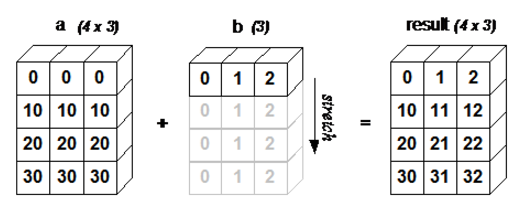

In [6]:
import tensorflow as tf

input_data = [
     [0,]
    ,[10,]
    ,[20,]
    ,[30,]
    ]
x = tf.placeholder(dtype=tf.float32,shape=[None,1])
w  =tf.Variable([[0, 1, 2]],dtype=tf.float32)
y = x+w

print('X\'s shape')
print(x.get_shape())
print('w\'s shape')
print(w.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y,feed_dict={x:input_data})

print('\nx + w')
print(result)

X's shape
(?, 1)
w's shape
(1, 3)

x + w
[[ 0.  1.  2.]
 [10. 11. 12.]
 [20. 21. 22.]
 [30. 31. 32.]]


위의 코드를 실행시킨 결과는 아래와 같다.
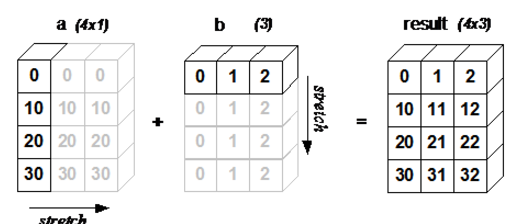
양쪽 행렬 둘 다 늘린 케이스이다.

- - -
# 행렬의 차원
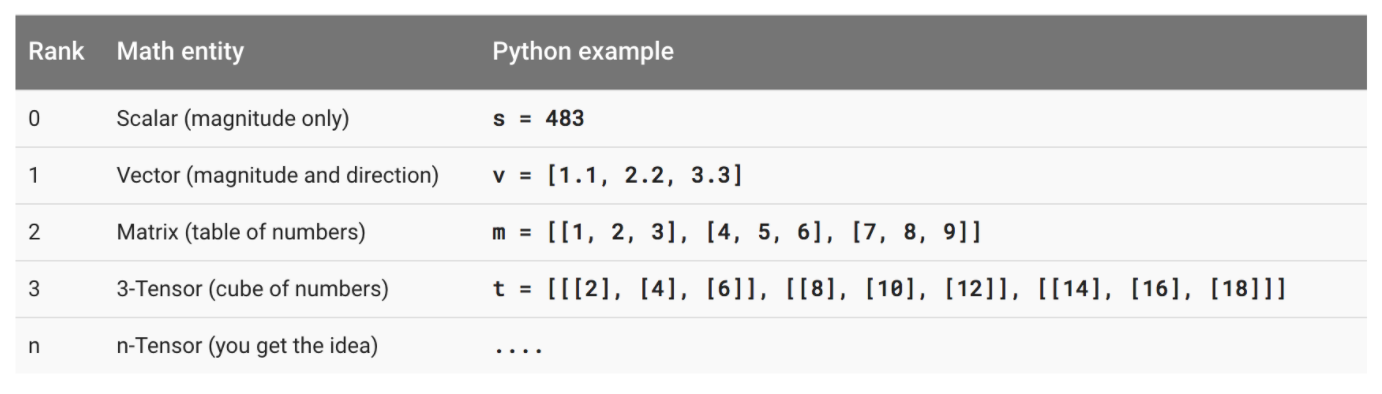
 - Rank 0 : Scalar, 상수
 - Rank 1 : Vector, 1차원 행렬
 - Rank 2 : Matrix, 2차원 행렬
 - Rank 3 : 3-Tensor or Cube, 3차원 행렬
 - Rank n : n-Tensor, 그 이상

- - -
### 중요 키워드
 1. Matrix 사용방법
 2. 브로드 캐스팅
 3. 행렬의 차원에 따른 명칭